In [1]:
# Imports
#---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib as mpl
import qgrid

register_matplotlib_converters()

# File locations
#----------------
the_gases = './oxaria/raw/1oxaria/json/gap_filling/batch_3_jun21_oct21/'
pngs = './oxaria/pngs/gap_filling/'


In [2]:
# Load the df 
#-------------
oxaria1_status = pd.read_feather(the_gases+'oxaria1_status_gf_oct.ftr').set_index(['tag','rec']).sort_index()


In [3]:
oxaria1_status.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1181794 entries, ('scs-bgx-536', Timestamp('2021-06-01 00:00:39+0000', tz='UTC')) to ('scs-bgx-543', Timestamp('2021-09-30 23:59:31+0000', tz='UTC'))
Data columns (total 31 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   val.sch.scs-particulates.tally     1181794 non-null  float32
 1   val.sch.scs-particulates.interval  1181794 non-null  float32
 2   val.sch.scs-status.tally           1181794 non-null  float32
 3   val.sch.scs-status.interval        1181794 non-null  float32
 4   val.sch.scs-climate.tally          1181794 non-null  float32
 5   val.sch.scs-climate.interval       1181794 non-null  float32
 6   val.sch.scs-gases.tally            1181794 non-null  float32
 7   val.sch.scs-gases.interval         1181794 non-null  float32
 8   val.gps.pos:0                      1141785 non-null  float32
 9   val.gps.pos:1                      1

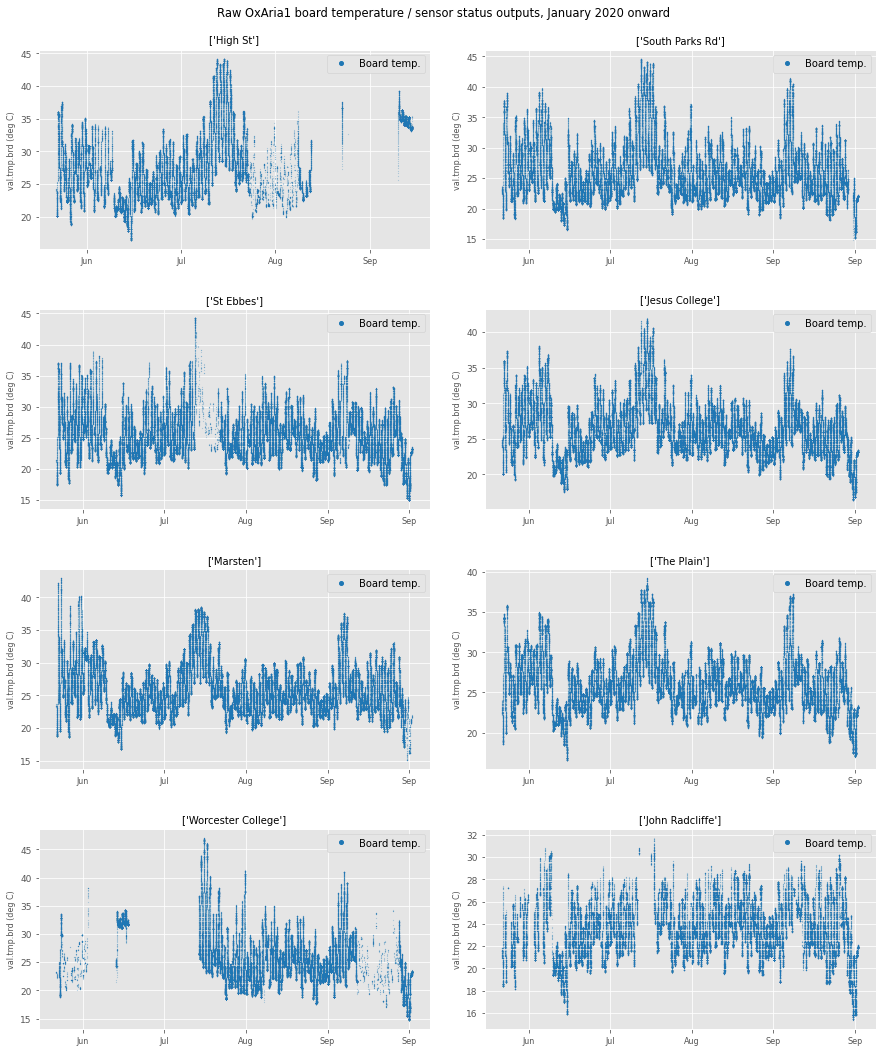

In [14]:
# Loop through plots with a log scale to compare time series & size fractions


plt.style.use('ggplot')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2020,12,31)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, sharey=False, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria1 board temperature / sensor status outputs, January 2020 onward', fontsize=11.5, y=0.91)

for tag, dat in oxaria1_status.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.tmp.brd', c='tab:blue',linewidth=0.5, marker='o', ms=0.1, ls='', label='Board temp.', ax=ax, legend=True, \
            zorder=1)
    ax.set_title(t_name, fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    #ax.set_xlim(start_date, end_date)
    ax.set_ylabel('val.tmp.brd (deg C)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper right') 
    
#plt.savefig(pngs+'oxaria1_brdtmp_raw_sensor_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()
